# Module import

In [328]:
import pandas as pd
import numpy as np
import math
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# My functions

In [2]:
def nan_ids(df, feature):
    return list(df.ID[df.isnull()[feature]])

def nan(df, feature):
    return df[df.isnull()[feature]]

# print value counts for the list pf columns
def count_values(df, cols):
    value_counts_di = {}
    for col in cols:
        tmp = df[col].value_counts()
        value_counts_di[col] = tmp

    for item, val in value_counts_di.items():
        print(item)
        print(val)
        print('\n')

# Data import

In [3]:
data = pd.read_excel('data.xlsx', sheet_name = "Справочник точек")
gain = pd.read_excel('data.xlsx', sheet_name = "Выручка по обучающей выборке")

# Look at the gain dataset

In [4]:
gain.shape

(155, 47)

In [5]:
# How many NAs are in gain dataframe
gain.isnull().sum()

id точки       3
2015-01-01    39
2015-02-01    39
2015-03-01    39
2015-04-01    39
2015-05-01    38
2015-06-01    38
2015-07-01    38
2015-08-01    37
2015-09-01    36
2015-10-01    36
2015-11-01    35
2015-12-01    29
2016-01-01    28
2016-02-01    25
2016-03-01    24
2016-04-01    24
2016-05-01    24
2016-06-01    26
2016-07-01    23
2016-08-01    18
2016-09-01    18
2016-10-01    14
2016-11-01    14
2016-12-01    12
2017-01-01    12
2017-02-01    12
2017-03-01    11
2017-04-01    10
2017-05-01    11
2017-06-01    10
2017-07-01     8
2017-08-01     8
2017-09-01     7
2017-10-01     4
2017-11-01     4
2017-12-01     3
2018-01-01     4
2018-02-01     4
2018-04-01     3
2018-05-01     4
2018-06-01     4
2018-07-01     4
2018-08-01     2
2018-09-01     2
2018-10-01     3
2018-11-01     2
dtype: int64

In [6]:
gain = gain.rename(columns = {'id точки': 'ID'})

### Drop rows with unknown IDs

In [8]:
gain[gain.ID.isnull()]

,ID,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2018-01-01,2018-02-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,114585.758339,118510.400000,94791.263333,93654.952258,108397.950,100705.532258,116268.127419,97226.428333,97570.266129,121038.385
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,502913.053140,594450.393471,560283.324000,514546.421768,644308.088,533981.383006,562082.839742,575194.942000,724658.394194,726229.020


In [9]:
gain = gain.drop(gain[gain.ID.isnull()].index)

# Modify gain dataframe

In [10]:
gain = gain.astype({"ID": "int64"})

In [11]:
gain.head(3)

,ID,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2018-01-01,2018-02-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01
0,11366,245709.342667,301024.685000,406199.782258,295602.853000,268179.172258,266579.009667,202667.039355,207347.022581,237393.216667,...,271084.023513,298845.267500,277776.347333,270902.919677,280106.099000,243448.836129,236709.816452,248268.778333,296637.103226,314456.870000
1,11810,270245.842066,297964.820199,406198.175918,232433.263996,229317.708387,251403.308057,242000.555806,260407.109247,267051.162996,...,245402.383180,273515.012143,240088.292000,196260.466452,228920.589000,204058.825161,207104.013135,203499.409840,206013.017419,218636.436000
2,15041,171972.976000,198141.440000,260215.741935,205316.010644,187059.870968,198590.970667,178250.637781,187094.699355,211000.005517,...,174154.623627,173190.240000,240396.837333,241494.616774,264873.765333,227461.233548,249503.230968,251805.680000,263152.960000,269913.018667


### Drop duplicates

In [12]:
gain.duplicated(keep = False).sum()

0

In [13]:
gain[gain.duplicated(subset = ['ID'], keep = False)]

,ID,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2018-01-01,2018-02-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01
83,42383,227416.886667,301359.175000,3.664930e+05,256595.884697,223962.096129,241470.289667,268201.834194,285165.496452,268671.797333,...,290967.715455,310493.430000,264606.220667,219131.287742,279045.797333,239944.954516,294459.344065,270101.650000,238021.185161,287760.169667
84,42383,394456.820997,454259.378600,5.836500e+05,443076.413799,391290.346452,408554.289000,357205.572574,390696.346452,417790.097997,...,482870.720640,508593.690000,438699.822000,445378.677097,425878.134000,369380.528710,407637.960968,384249.393000,449429.469677,516463.893000
110,42597,159357.770000,163778.550000,2.092373e+05,119044.440667,120611.429355,155005.578000,146695.845484,155073.011935,178703.464333,...,258394.352932,303328.447500,232310.533000,206991.946452,256464.936000,222763.039032,257462.160968,238893.624667,254131.913226,304643.126667
111,42597,788735.620309,915970.362829,1.215916e+06,872090.908507,780988.410697,822884.550667,697784.523255,757521.236129,814036.689248,...,849055.735613,953085.207143,787095.805333,804114.132903,817746.833333,665763.477419,735152.020645,704202.978667,828985.715355,945777.193333


In [14]:
# Delete shops with ID 42383 and 42597 from gain dataframe
gain = gain.drop_duplicates(subset = ['ID'], keep = False)
gain[gain.duplicated(subset = ['ID'], keep = False)]

,ID,2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,...,2018-01-01,2018-02-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01


In [15]:
gain_IDs = set(gain.ID)
len(gain_IDs) # the number of unique shop IDs from gain dataframe

148

# Look at the data

In [17]:
data.tail(3)

,id точки,Адрес,Широта,Долгота,Дата открытия,Дата закрытия,Площадь магазина,Тип входа,Площадь ТЦ,Формат магазина,...,Этаж,Время работы,Заполненность ТЦ,Рядом с эскалатором,Рядом со входом,Конкуренты в ТЦ,Расположение в ТЦ,Толока,Люкс,Выборка
243,2633935.0,"Ярославская обл, г. Ярославль, ул. Победы, дом...",39.869236,57.626872,2013-09-14 00:00:00,NaT,423,без сквозного прохода,120000.0,ТЦ,...,1,с 10:00 до 22:00,3.0,0,0,2.0,9.0,54.416490,72.034483,Обучающая
244,2633946.0,"Ярославская обл, г. Ярославль, ул. Свободы, до...",39.883707,57.624998,2008-08-28 00:00:00,NaT,290,без сквозного прохода,4000.0,ТЦ,...,1,с 10:00 до 21:00,NaN,0,0,NaN,9.0,27.151259,61.517241,Обучающая
245,2633948.0,"Ярославская обл, Ярославский район, Телегински...",39.783545,57.645195,2006-12-12 00:00:00,NaT,319,без сквозного прохода,42000.0,ТЦ,...,1,с 10:00 до 22:00,3.0,1,0,1.0,7.0,27.845666,47.896552,Обучающая


In [18]:
print(data.shape)

(246, 21)


In [19]:
data.columns

Index(['id точки', 'Адрес', 'Широта', 'Долгота', 'Дата открытия',
       'Дата закрытия', 'Площадь магазина', 'Тип входа', 'Площадь ТЦ',
       'Формат магазина', 'Парковка', 'Этаж', 'Время работы',
       'Заполненность ТЦ', 'Рядом с эскалатором', 'Рядом со входом',
       'Конкуренты в ТЦ', 'Расположение в ТЦ', 'Толока', 'Люкс', 'Выборка'],
      dtype='object')

In [20]:
data = data.rename(columns = {'id точки': 'ID',
                      'Дата открытия': 'Дата_открытия', 'Дата закрытия':'Дата_закрытия',
                      'Площадь магазина':'Площадь_магазина',
                       'Тип входа': 'Тип_входа', 'Площадь ТЦ': 'Площадь_ТЦ',
                       'Формат магазина': 'Формат_магазина', 'Время работы':'Время_работы',
                       'Заполненность ТЦ': 'Заполненность_ТЦ',
                       'Рядом с эскалатором':'Рядом_с_эскалатором',
                       'Рядом со входом':'Рядом_со_входом',
                       'Конкуренты в ТЦ': 'Конкуренты_в_ТЦ',
                       'Расположение в ТЦ':'Расположение_в_ТЦ'})

In [21]:
data.head()

,ID,Адрес,Широта,Долгота,Дата_открытия,Дата_закрытия,Площадь_магазина,Тип_входа,Площадь_ТЦ,Формат_магазина,...,Этаж,Время_работы,Заполненность_ТЦ,Рядом_с_эскалатором,Рядом_со_входом,Конкуренты_в_ТЦ,Расположение_в_ТЦ,Толока,Люкс,Выборка
0,8955.0,"Оренбургская обл, Оренбург г, Шарлыкское ш, д...",55.118272,51.843127,2016-11-09 00:00:00,NaT,478,без сквозного прохода,130000.0,ТЦ,...,3,с 10:00 до 22:00,NaN,0,0,1.0,7.0,37.857582,69.500000,Обучающая
1,11007.0,"Алтайский край, г. Барнаул, ул. Малахова, дом ...",83.696799,53.356954,2010-04-26 00:00:00,NaT,332,сквозной проход,31500.0,ТЦ,...,1,с 10:00 до 22:00,NaN,0,1,NaN,9.0,57.810494,66.896552,Обучающая
2,11366.0,"Амурская область, Благовещенск, улица Мухина, 114",127.510357,50.280435,2017-08-25 00:00:00,NaT,356,без сквозного прохода,36000.0,ТЦ,...,1,с 10:00 до 22:00,3.0,0,1,1.0,6.0,49.959831,68.727273,Обучающая
3,11810.0,"Архангельская обл, г. Архангельск , Троицкий п...",40.528249,64.532316,2012-11-03 00:00:00,NaT,317,отдельный вход с улицы + сквозной проход,35000.0,ТЦ,...,1,с 10:00 до 21:00,3.0,0,1,0.0,10.0,128.459158,64.517241,Обучающая
4,15041.0,"Архангельская обл, г. Архангельск, Троицкий пр...",40.526317,64.534327,2006-12-09 00:00:00,NaT,176,сквозной проход,15332.0,ТЦ,...,цоколь,с 10:00 до 21:00,3.0,1,0,NaN,0.0,103.199885,78.275862,Тестовая


In [28]:
# Delete shops with ID 42383 and 42597 from gain dataframe (duplicates in gain file)
data = data.drop(data[data.ID==42383].index)
data = data.drop(data[data.ID==42597].index)

In [29]:
data.shape

(244, 21)

# Find duplicates

In [30]:
data.duplicated(subset = ['ID']).sum()

2

In [31]:
data[data.duplicated(subset = ['ID'], keep=False)]

,ID,Адрес,Широта,Долгота,Дата_открытия,Дата_закрытия,Площадь_магазина,Тип_входа,Площадь_ТЦ,Формат_магазина,...,Этаж,Время_работы,Заполненность_ТЦ,Рядом_с_эскалатором,Рядом_со_входом,Конкуренты_в_ТЦ,Расположение_в_ТЦ,Толока,Люкс,Выборка
186,42645.0,"Респ. Татарстан, г. Нижнекамск, ул. Химиков, д...",51.814376,55.631285,2006-04-16 00:00:00,NaT,255,без сквозного прохода,2887.0,Мини ТЦ,...,1,с 9:00 до 21:00,3.0,1,1,NaN,10.0,29.981741,54.620690,Обучающая
194,42683.0,"Россия, Пензенская область, Пенза, проспект Ст...",44.951652,53.220492,2013-12-27 00:00:00,NaT,578,без сквозного прохода,54500.0,ТЦ,...,1,с 10:00 до 22:00,3.0,1,0,1.0,8.0,34.480876,60.500000,Обучающая
195,42683.0,"Россия, Пермский край, Пермь, улица Попова, 16",56.228132,58.008433,2012-07-15 00:00:00,NaT,277,без сквозного прохода,6400.0,Мини ТЦ,...,1,с 10:00 до 21:00,NaN,0,0,NaN,8.0,33.196617,63.896552,Обучающая
238,42645.0,"Респ. Татарстан, г. Нижнекамск, ул. Химиков, д...",51.814376,55.631285,2006-04-16 00:00:00,NaT,255,без сквозного прохода,2887.0,Мини ТЦ,...,1,с 9:00 до 21:00,3.0,1,1,NaN,10.0,29.981741,54.620690,Обучающая


In [32]:
# Drop completely identical rows
data = data.drop_duplicates(keep='first')

In [33]:
data[data.duplicated(subset = ['ID'], keep=False)]

,ID,Адрес,Широта,Долгота,Дата_открытия,Дата_закрытия,Площадь_магазина,Тип_входа,Площадь_ТЦ,Формат_магазина,...,Этаж,Время_работы,Заполненность_ТЦ,Рядом_с_эскалатором,Рядом_со_входом,Конкуренты_в_ТЦ,Расположение_в_ТЦ,Толока,Люкс,Выборка
194,42683.0,"Россия, Пензенская область, Пенза, проспект Ст...",44.951652,53.220492,2013-12-27 00:00:00,NaT,578,без сквозного прохода,54500.0,ТЦ,...,1,с 10:00 до 22:00,3.0,1,0,1.0,8.0,34.480876,60.500000,Обучающая
195,42683.0,"Россия, Пермский край, Пермь, улица Попова, 16",56.228132,58.008433,2012-07-15 00:00:00,NaT,277,без сквозного прохода,6400.0,Мини ТЦ,...,1,с 10:00 до 21:00,NaN,0,0,NaN,8.0,33.196617,63.896552,Обучающая


In [34]:
# Drop the shope with ID = 42683
data = data.drop_duplicates(subset = ['ID'], keep=False)

In [35]:
data[data.duplicated(subset = ['ID'], keep=False)]

,ID,Адрес,Широта,Долгота,Дата_открытия,Дата_закрытия,Площадь_магазина,Тип_входа,Площадь_ТЦ,Формат_магазина,...,Этаж,Время_работы,Заполненность_ТЦ,Рядом_с_эскалатором,Рядом_со_входом,Конкуренты_в_ТЦ,Расположение_в_ТЦ,Толока,Люкс,Выборка


In [36]:
data.shape

(241, 21)

# List of IDs for rows with missing values

In [ ]:
# Fraction of missing values
#data.isna().mean()

In [60]:
# Number of missing values values
missing_val = dict(data.isnull().sum())
for key, val in missing_val.items():
    if val != 0 and val < 30:
        print(f"Column {key}: IDs : {nan_ids(data, key)}")
        print('\n')
    if val > 30:
        print(f"Column {key}: {len(nan_ids(data, key))} missing values")

Column ID: IDs : [nan]


Column Широта: IDs : [42437.0, 42443.0, 42509.0, 42667.0]


Column Долгота: IDs : [42437.0, 42443.0, 42509.0, 42667.0]


Column Дата_открытия: IDs : [42220.0]


Column Дата_закрытия: 233 missing values
Column Тип_входа: IDs : [42437.0, 42443.0]


Column Площадь_ТЦ: 42 missing values
Column Парковка: IDs : [18010.0, 42001.0, 42056.0, 42059.0, 42072.0, 42100.0, 42118.0, 42132.0, 42189.0, 42191.0, 42288.0, 42345.0, 42437.0, 42443.0, 42499.0, 42505.0, 42780.0, 42800.0, 42810.0, 2633928.0]


Column Этаж: IDs : [41914.0, 42388.0, 42438.0, 42598.0, 42775.0]


Column Время_работы: IDs : [17987.0, 18527.0, 42319.0, 42389.0, 42406.0, 42419.0, 42420.0, 42437.0, 42443.0, 42509.0, 42667.0, 42745.0, 2633927.0, 2633930.0]


Column Заполненность_ТЦ: 63 missing values
Column Конкуренты_в_ТЦ: 149 missing values
Column Расположение_в_ТЦ: IDs : [18010.0, 41842.0, 42001.0, 42051.0, 42056.0, 42072.0, 42100.0, 42118.0, 42132.0, 42189.0, 42191.0, 42288.0, 42345.0, 42466.0, 42481.0, 42

### Missing values in "Выборка"

In [61]:
#data[data.Выборка.isna()].ID.values[0] # ID of shop with missing Выборка value
#gain.ID[gain.ID == data[data.Выборка.isna()].ID.values[0]].values[0] # find the same ID in gain dataframe
data[["Выборка"]] = data[["Выборка"]].fillna(value='Обучающая')

### Drop missing values in ID

In [62]:
data = data.dropna(axis = 0, subset = ['ID'])

### Fill missing values of Тип_входа and Этаж with mode

In [65]:
nan_ids(data, 'Тип_входа')

[]

In [64]:
data['Тип_входа'] = data['Тип_входа'].fillna(mode(data['Тип_входа'])[0][0])
data['Этаж'] = data['Этаж'].fillna(mode(data['Этаж'])[0][0])

<ipython-input-64-2e466542cced>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Тип_входа'] = data['Тип_входа'].fillna(mode(data['Тип_входа'])[0][0])
<ipython-input-64-2e466542cced>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Этаж'] = data['Этаж'].fillna(mode(data['Этаж'])[0][0])


# Treating inccorect values

### Check object values

In [66]:
data.dtypes

ID                            float64
Адрес                          object
Широта                        float64
Долгота                       float64
Дата_открытия                  object
Дата_закрытия          datetime64[ns]
Площадь_магазина                int64
Тип_входа                      object
Площадь_ТЦ                    float64
Формат_магазина                object
Парковка                       object
Этаж                           object
Время_работы                   object
Заполненность_ТЦ              float64
Рядом_с_эскалатором             int64
Рядом_со_входом                 int64
Конкуренты_в_ТЦ               float64
Расположение_в_ТЦ             float64
Толока                        float64
Люкс                          float64
Выборка                        object
dtype: object

### Change type of ID and Дата_открытия, Дата_закрытия values

In [67]:
data = data.astype({"ID": "int64"})

In [68]:
data['Дата_открытия'] = pd.to_datetime(data['Дата_открытия'])
data['Дата_закрытия'] = pd.to_datetime(data['Дата_закрытия'])

### Change values & delete values with errors

In [69]:
data.columns

Index(['ID', 'Адрес', 'Широта', 'Долгота', 'Дата_открытия', 'Дата_закрытия',
       'Площадь_магазина', 'Тип_входа', 'Площадь_ТЦ', 'Формат_магазина',
       'Парковка', 'Этаж', 'Время_работы', 'Заполненность_ТЦ',
       'Рядом_с_эскалатором', 'Рядом_со_входом', 'Конкуренты_в_ТЦ',
       'Расположение_в_ТЦ', 'Толока', 'Люкс', 'Выборка'],
      dtype='object')

In [70]:
cols_counts = ['Тип_входа', 'Формат_магазина', 'Этаж', 'Время_работы',
               'Заполненность_ТЦ', 'Рядом_с_эскалатором', 'Рядом_со_входом',
              'Конкуренты_в_ТЦ', 'Выборка']

In [71]:
count_values(data, cols_counts)

Тип_входа
без сквозного прохода                       136
сквозной проход                              45
отдельный вход с улицы                       36
отдельный вход с улицы + сквозной проход     17
единственный вход в ТК                        6
Name: Тип_входа, dtype: int64


Формат_магазина
ТЦ         189
Мини ТЦ     24
Street      18
Стрит        4
Мини-ТЦ      3
Strееt       1
Стрт         1
Name: Формат_магазина, dtype: int64


Этаж
1                      216
3                       10
2                        6
цоколь                   5
20                       1
2019-05-02 00:00:00      1
4.5                      1
Name: Этаж, dtype: int64


Время_работы
с 10:00 до 22:00                                                            126
с 10:00 до 21:00                                                             62
с 9:00 до 21:00                                                               6
Вс-Чт с 10:00 до 22:00 Пт-Сб с 10:00 до 23:00                                 4
с 10:

### Change incorrect values for Формат_магазина, Этаж, Рядом_с_эскалатором, Рядом_со_входом

In [72]:
data = data.replace({'Формат_магазина': {'Мини ТЦ': 'Мини-ТЦ', 'Street': 'Стрит', 'Стрт': 'Стрит',
                                 'Strееt': 'Стрит'},
                    'Этаж': {'цоколь': -1, 20: 1, 4.5: 1},
                    'Рядом_с_эскалатором': {2: mode(data['Рядом_с_эскалатором'])[0][0]},
                    'Рядом_со_входом': {2: mode(data['Рядом_со_входом'])[0][0], 3: mode(data['Рядом_со_входом'])[0][0]}}
                   )

In [73]:
count_values(data, ['Формат_магазина', 'Этаж',  'Рядом_с_эскалатором', 'Рядом_со_входом'])

Формат_магазина
ТЦ         189
Мини-ТЦ     27
Стрит       24
Name: Формат_магазина, dtype: int64


Этаж
1                      218
3                       10
2                        6
-1                       5
2019-05-02 00:00:00      1
Name: Этаж, dtype: int64


Рядом_с_эскалатором
0    133
1    107
Name: Рядом_с_эскалатором, dtype: int64


Рядом_со_входом
0    130
1    110
Name: Рядом_со_входом, dtype: int64




In [74]:
data.isnull().sum()

ID                       0
Адрес                    0
Широта                   4
Долгота                  4
Дата_открытия            1
Дата_закрытия          232
Площадь_магазина         0
Тип_входа                0
Площадь_ТЦ              42
Формат_магазина          0
Парковка                20
Этаж                     0
Время_работы            14
Заполненность_ТЦ        63
Рядом_с_эскалатором      0
Рядом_со_входом          0
Конкуренты_в_ТЦ        149
Расположение_в_ТЦ       22
Толока                   0
Люкс                     0
Выборка                  0
dtype: int64

### Delete incorrect Этаж value

In [75]:
#data[data['Этаж'] == pd._libs.tslibs.timestamps.Timestamp('2019-05-02 00:00:00')]
data = data.drop(labels = 234, axis = 0)
#data_new['Этаж'].value_counts()

In [76]:
count_values(data, ['Этаж'])

Этаж
 1    218
 3     10
 2      6
-1      5
Name: Этаж, dtype: int64




### Drop rows with incorrect Парковка values

In [77]:
count_values(data, ['Парковка'])

Парковка
бесплатная парковка    153
нет парковки            32
платная парковка        30
бесплатная паpковка      1
700                      1
1000                     1
100                      1
Name: Парковка, dtype: int64




In [78]:
data = data.replace({'Парковка':{'бесплатная паpковка': 'бесплатная парковка',
                                100: 'бесплатная парковка',
                                700: 'бесплатная парковка',
                                1000: 'бесплатная парковка'}})

In [79]:
count_values(data, ['Парковка'])

Парковка
бесплатная парковка    157
нет парковки            32
платная парковка        30
Name: Парковка, dtype: int64




### Split Время_работы and change it

In [80]:
data = data.reset_index(drop = True)

In [81]:
count_values(data, ['Время_работы'])

Время_работы
с 10:00 до 22:00                                                            125
с 10:00 до 21:00                                                             62
с 9:00 до 21:00                                                               6
Вс-Чт с 10:00 до 22:00 Пт-Сб с 10:00 до 23:00                                 4
с 10:00 до 23:00                                                              3
Пн-Сб с 10:00 до 21:00  Вс с 11:00 до 21:00                                   3
c 9:00 до 21:00                                                               2
Вс-Чт c 10:00 до 23:00           Пт-Сб с 10:00 до 24:00                       2
с 11:00 до 21:00                                                              2
Вс-Чт с 10:00 до 21:00     Пт-Сб с  10:00 до 22:00                            1
c 10:00 до 24:00                                                              1
Пн-Сб с 10:00 до 21:00 Вс с 10:00 до 20:00                                    1
Вс-Чт c 10:00 до 22:00     

In [ ]:
#data.loc[0, 'Время_открытия'] = '10:00'

In [ ]:
# Makes empty columns
data['Время_открытия_1'] = np.nan
data['Время_закрытия_1'] = np.nan
data['Дни_недели_1'] = np.nan

data['Время_открытия_2'] = np.nan
data['Время_закрытия_2'] = np.nan
data['Дни_недели_2'] = np.nan

data['Время_открытия_3'] = np.nan
data['Время_закрытия_3'] = np.nan
data['Дни_недели_3'] = np.nan

for i in range(len(data)):
    split = str(data.Время_работы[i]).split()
    if len(split) == 4:
        
        data.loc[i, 'Время_открытия_1'] = split[1]
        data.loc[i, 'Время_закрытия_1'] = split[3]
        data.loc[i, 'Дни_недели_1'] = 'каждый'
    elif len(split) == 10:
        #print(split, len(split))
        data.loc[i, 'Время_открытия_1'] = split[2]
        data.loc[i, 'Время_закрытия_1'] = split[4]
        data.loc[i, 'Дни_недели_1'] = split[0]
        
        data.loc[i, 'Время_открытия_2'] = split[7]
        data.loc[i, 'Время_закрытия_2'] = split[9]
        data.loc[i, 'Дни_недели_2'] = split[5]
    elif len(split) == 15:
        #print(split, len(split))
        data.loc[i, 'Время_открытия_1'] = split[2]
        data.loc[i, 'Время_закрытия_1'] = split[4]
        data.loc[i, 'Дни_недели_1'] = split[0]
        
        data.loc[i, 'Время_открытия_2'] = split[7]
        data.loc[i, 'Время_закрытия_2'] = split[9]
        data.loc[i, 'Дни_недели_2'] = split[5]
        
        data.loc[i, 'Время_открытия_3'] = split[12]
        data.loc[i, 'Время_закрытия_3'] = split[14]
        data.loc[i, 'Дни_недели_3'] = split[10]

In [ ]:
count_values(data, ['Время_открытия_1', 'Время_закрытия_1', 'Дни_недели_1',
             'Время_открытия_2', 'Время_закрытия_2', 'Дни_недели_2',
             'Время_открытия_3', 'Время_закрытия_3', 'Дни_недели_3'])

In [ ]:
data = data.replace({'Время_открытия_1': {'10-00': '10:00'},
                     'Время_закрытия_1': {'21-00': '21:00'}})

In [ ]:
count_values(data, ['Время_открытия_1', 'Время_закрытия_1', 'Дни_недели_1'])

### Change Выборка

In [82]:
data.Выборка.value_counts()

Обучающая    151
Тестовая      77
-              9
Обyчающая      1
Тест           1
Name: Выборка, dtype: int64

In [83]:
data = data.replace({'Выборка': {'Обyчающая': 'Обучающая', 'Тест': 'Тестовая'}})

In [84]:
data.Выборка.value_counts()

Обучающая    152
Тестовая      78
-              9
Name: Выборка, dtype: int64

In [85]:
# IDs of the shops with incorrect Выборка values in data dataframe
check_Выборка_ids = set(data.ID[data.Выборка == "-"])
print(check_Выборка_ids)

{42340, 42122, 42156, 42192, 42546, 18931, 42388, 42706, 42204}


In [86]:
# IDs with incorrect Выборка values must be change to Обучающая
set_ids_train = set(gain.query('ID in @check_Выборка_ids').ID)
print(set_ids_train)

{42192, 42204, 42156}


In [87]:
# IDs with incorrect Выборка values must be change to Тестовая
set_ids_test = check_Выборка_ids.difference(set_ids_train)
print(set_ids_test, len(set_ids_test))

{42340, 42122, 42546, 18931, 42388, 42706} 6


In [88]:
# Make shops with IDs 42156, 42192, 42204 train, others - test
data.Выборка[(data.ID == 42156) | (data.ID == 42192)  | (data.ID == 42204)] = 'Обучающая'

<ipython-input-88-96b5572a7775>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Выборка[(data.ID == 42156) | (data.ID == 42192)  | (data.ID == 42204)] = 'Обучающая'


In [91]:
for i in set_ids_test:
    data.Выборка[(data.ID == i)] = 'Тестовая'

<ipython-input-91-25afbcd63665>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Выборка[(data.ID == i)] = 'Тестовая'
<ipython-input-91-25afbcd63665>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Выборка[(data.ID == i)] = 'Тестовая'
<ipython-input-91-25afbcd63665>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Выборка[(data.ID == i)] = 'Тестовая'
<ipython-input-91-25afbcd63665>:2: SettingWithCopyWarning: 
A value is

In [92]:
data.Выборка.value_counts()

Обучающая    155
Тестовая      84
Name: Выборка, dtype: int64

In [94]:
nan(data, 'Выборка')

,ID,Адрес,Широта,Долгота,Дата_открытия,Дата_закрытия,Площадь_магазина,Тип_входа,Площадь_ТЦ,Формат_магазина,...,Этаж,Время_работы,Заполненность_ТЦ,Рядом_с_эскалатором,Рядом_со_входом,Конкуренты_в_ТЦ,Расположение_в_ТЦ,Толока,Люкс,Выборка


### Delete excess IDs from data

In [145]:
gain_IDs = set(gain.ID)
data_train_IDs = set(data.ID[data.Выборка == 'Обучающая'])
data_test_IDs = set(data.ID[data.Выборка == 'Тестовая'])

print("Итого: Обучающая выборка", len(data_train_IDs), "\n"
      "Тестовая выборка:", len(data_test_IDs), "\n"
     "Данные по выручке:", len(gain_IDs))

Итого: Обучающая выборка 155 
Тестовая выборка: 84 
Данные по выручке: 148


In [149]:
# Train IDs in gain and data
correct_IDs = data_train_IDs.intersection(gain_IDs)
print(len(correct_IDs))

92


In [154]:
# Test IDs in data that must be changed to train
test_to_train = data_test_IDs.intersection(gain_IDs)
print(len(test_to_train))
print(test_to_train)

48
{42368, 42499, 42375, 42253, 42263, 42525, 41890, 42406, 42792, 42665, 42028, 42288, 42803, 42548, 42422, 42681, 42556, 17983, 42432, 15041, 42689, 42179, 42696, 42057, 41930, 42443, 42316, 41937, 42194, 42067, 42072, 42201, 42075, 42332, 42590, 42847, 18531, 41955, 42469, 42217, 42345, 42224, 42355, 42484, 42102, 42486, 42745, 41978}


In [168]:
# IDs in gain that don't contain in data file
gain_IDs_to_rm = gain_IDs - data_train_IDs - data_test_IDs
print(gain_IDs_to_rm)

{2633921, 45801, 42831, 2634000, 2633936, 2634008, 2634011, 42683}


In [179]:
# IDs that must be turn into test
train_to_test = data_train_IDs - gain_IDs
len(train_to_test)

63

In [195]:
# Delete row in gain dataframe
gain = gain.drop(list(gain.query('ID in @gain_IDs_to_rm').index))

In [206]:
# Replace test to train in data
indices = data.query('ID in @test_to_train').index.tolist()
data.loc[indices, 'Выборка'] = 'Обучающая'

In [212]:
# Replace train to test in data
indices = data.query('ID in @train_to_test').index.tolist()
data.loc[indices, 'Выборка'] = 'Тестовая'

In [214]:
# Проверка
gain_IDs = set(gain.ID)
data_train_IDs = set(data.ID[data.Выборка == 'Обучающая'])
data_test_IDs = set(data.ID[data.Выборка == 'Тестовая'])

print("Итого: Обучающая выборка", len(data_train_IDs), "\n"
      "Тестовая выборка:", len(data_test_IDs), "\n"
     "Данные по выручке:", len(gain_IDs))

Итого: Обучающая выборка 140 
Тестовая выборка: 99 
Данные по выручке: 140


In [216]:
len(data_train_IDs.intersection(gain_IDs))

140

# Split data to test and train

In [217]:
X_train = data[data['Выборка']=='Обучающая']
X_test = data[data['Выборка']=='Тестовая']

In [218]:
X_train.isnull().sum()

ID                       0
Адрес                    0
Широта                   2
Долгота                  2
Дата_открытия            1
Дата_закрытия          137
Площадь_магазина         0
Тип_входа                0
Площадь_ТЦ              24
Формат_магазина          0
Парковка                13
Этаж                     0
Время_работы             6
Заполненность_ТЦ        44
Рядом_с_эскалатором      0
Рядом_со_входом          0
Конкуренты_в_ТЦ         84
Расположение_в_ТЦ       15
Толока                   0
Люкс                     0
Выборка                  0
dtype: int64

# Ответы на вопросы

In [219]:
data.columns

Index(['ID', 'Адрес', 'Широта', 'Долгота', 'Дата_открытия', 'Дата_закрытия',
       'Площадь_магазина', 'Тип_входа', 'Площадь_ТЦ', 'Формат_магазина',
       'Парковка', 'Этаж', 'Время_работы', 'Заполненность_ТЦ',
       'Рядом_с_эскалатором', 'Рядом_со_входом', 'Конкуренты_в_ТЦ',
       'Расположение_в_ТЦ', 'Толока', 'Люкс', 'Выборка'],
      dtype='object')

In [220]:
# Сколько магазинов формата стрит в тестовой выборке? Ответ: 8
count_values(X_test, ['Формат_магазина'])

Формат_магазина
ТЦ         81
Мини-ТЦ    10
Стрит       8
Name: Формат_магазина, dtype: int64




In [221]:
# Сколько магазинов с бесплатной парковкой? Ответ: 157 (во всей выборке)
count_values(data, ['Парковка'])

Парковка
бесплатная парковка    157
нет парковки            32
платная парковка        30
Name: Парковка, dtype: int64




In [222]:
count_values(X_test, ['Парковка']) # Ответ 74 (в тестовой выборке)

Парковка
бесплатная парковка    74
нет парковки           12
платная парковка        6
Name: Парковка, dtype: int64




In [224]:
# Какова средняя выручка магазинов формата мини ТЦ за 2016 год? 17 магазинов
count_values(X_train, ['Формат_магазина'])

Формат_магазина
ТЦ         107
Мини-ТЦ     17
Стрит       16
Name: Формат_магазина, dtype: int64




In [270]:
id_mini = list(X_train.ID[X_train.Формат_магазина=='Мини-ТЦ'])
gain_mini = gain.query('ID in @id_mini')
gain_mini = gain_mini.loc[:, gain_mini.columns.str.contains('ID|2016')]
gain_mini = gain_mini.reset_index(drop = True)

In [271]:
gain_mini
# 42720, 42743, 42803 - нет данных о закрытии магазина

,ID,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,2016-10-01,2016-11-01,2016-12-01
0,18728,367035,518192,612575,462815,477768,451050.096000,401384.010323,383641.476129,422102.426667,422386.720000,405809,856555
1,41824,288252,380477,409750,335297,341503,310039.590000,273176.738710,293777.854839,343191.180000,338595.300000,311295,588299
2,41933,96125.5,131703,166441,103034,109411,107573.640000,98078.632258,115117.374194,104382.240000,132300.493548,102603,228666
3,42067,618664,778686,948357,610125,648605,628196.226000,541807.499032,548504.053548,589191.498000,637511.713548,627180,1.42202e+06
4,42192,157156,219536,263464,180751,174378,200850.477333,172807.401290,181212.264516,182401.356000,210517.014194,161834,288096
5,42219,165362,183197,234129,181152,166159,173533.509333,162844.341333,169838.714839,173049.632000,200700.714667,179830,296884
6,42242,262235,341500,413341,278217,253407,291884.933333,245933.264516,220819.148387,268867.520000,274188.619355,257092,560731
7,42355,79599.7,99675.2,129199,83833,90507.8,143539.242667,204567.081290,239827.447742,194232.533333,130127.483871,89367,179 944.79
8,42368,545935,646203,769326,567838,554051,655431.680000,596274.787097,670410.405161,650349.909333,694186.157419,614323,1.15111e+06
9,42422,221053,236999,294686,186389,188043,227255.242667,228655.803871,246902.518710,184107.914667,239920.185806,220087,433697


In [272]:
gain_mini = gain_mini.fillna(value = 0)

In [273]:
gain_mini.describe()

,ID,2016-01-01,2016-02-01,2016-03-01,2016-04-01,2016-05-01,2016-06-01,2016-07-01,2016-08-01,2016-09-01,2016-10-01,2016-11-01
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,40977.764706,223692.613091,283514.497117,342673.806802,234907.985718,235639.168558,249953.454235,260428.903275,278519.900398,294126.593686,326431.248944,303612.748520
std,5740.044714,174481.232260,219506.545533,261935.706518,182385.153038,187064.408877,191140.453071,166371.900536,153037.266010,175222.880861,197571.262242,196770.174323
min,18728.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42192.000000,96125.460000,131703.051724,166441.238710,103033.830000,109410.630000,143539.242667,172807.401290,220819.148387,184107.914667,210517.014194,179830.299040
50%,42368.000000,221053.099355,268136.578621,331250.030323,218518.301333,207277.721935,227255.242667,245933.264516,255120.270964,268095.833333,283937.000000,281229.467333
75%,42504.000000,288251.640000,373763.172414,424251.653226,278217.413333,268194.838710,291884.933333,273176.738710,313307.100000,344379.250000,402658.104839,377204.916250
max,42803.000000,618664.284420,778685.648276,948356.721290,610125.390000,648604.550319,655431.680000,596274.787097,670410.405161,650349.909333,710535.174194,719798.160400


In [277]:
gain_mini['Mean'] = gain_mini.drop('ID', axis=1).mean(axis = 1)

In [280]:
gain_mini.loc[:, ['ID', 'Mean']]

,ID,Mean
0,18728,447705.269242
1,41824,329577.635033
2,41933,115160.841858
3,42067,652438.859274
4,42192,191355.248942
5,42219,180890.465756
6,42242,282498.755571
7,42355,134952.291671
8,42368,633120.934025
9,42422,224917.983557


# Analytics for X_train

In [284]:
X_train = X_train.reset_index(drop = True)

In [285]:
X_train.head()

,ID,Адрес,Широта,Долгота,Дата_открытия,Дата_закрытия,Площадь_магазина,Тип_входа,Площадь_ТЦ,Формат_магазина,...,Этаж,Время_работы,Заполненность_ТЦ,Рядом_с_эскалатором,Рядом_со_входом,Конкуренты_в_ТЦ,Расположение_в_ТЦ,Толока,Люкс,Выборка
0,11366,"Амурская область, Благовещенск, улица Мухина, 114",127.510357,50.280435,2017-08-25,NaT,356,без сквозного прохода,36000.0,ТЦ,...,1,с 10:00 до 22:00,3.0,0,1,1.0,6.0,49.959831,68.727273,Обучающая
1,11810,"Архангельская обл, г. Архангельск , Троицкий п...",40.528249,64.532316,2012-11-03,NaT,317,отдельный вход с улицы + сквозной проход,35000.0,ТЦ,...,1,с 10:00 до 21:00,3.0,0,1,0.0,10.0,128.459158,64.517241,Обучающая
2,15041,"Архангельская обл, г. Архангельск, Троицкий пр...",40.526317,64.534327,2006-12-09,NaT,176,сквозной проход,15332.0,ТЦ,...,-1,с 10:00 до 21:00,3.0,1,0,NaN,0.0,103.199885,78.275862,Обучающая
3,15775,"Астраханская обл, г. Астрахань, ул. Боевая, до...",48.023172,46.338313,2014-02-05,NaT,521,без сквозного прохода,130000.0,ТЦ,...,1,с 10:00 до 22:00,NaN,0,1,1.0,8.0,38.935806,62.827586,Обучающая
4,16102,"Барнаул г, Ленина пр-кт, дом № 102В, ТЦ ""Пионер""",83.764275,53.362114,2017-06-07,NaT,369,отдельный вход с улицы + сквозной проход,80000.0,ТЦ,...,1,с 10:00 до 22:00,0.0,0,0,0.0,1.5,27.525274,65.500000,Обучающая


In [286]:
X_train.shape

(140, 21)

In [287]:
X_train.describe()

,ID,Широта,Долгота,Площадь_магазина,Площадь_ТЦ,Заполненность_ТЦ,Рядом_с_эскалатором,Рядом_со_входом,Конкуренты_в_ТЦ,Расположение_в_ТЦ,Толока,Люкс
count,140.000000,138.000000,138.000000,140.000000,116.000000,96.0000,140.000000,140.000000,56.000000,125.000000,140.000000,140.000000
mean,39786.271429,46.746871,55.780420,375.164286,69327.327586,2.3125,0.385714,0.464286,0.696429,7.908000,58.466761,70.991579
std,7750.169421,25.055355,5.870006,216.347496,59401.103633,1.0189,0.488511,0.500514,0.736568,2.915741,34.287887,13.401250
min,11366.000000,20.500255,43.212639,108.000000,700.000000,0.0000,0.000000,0.000000,0.000000,0.000000,10.454353,36.724138
25%,42022.750000,30.753424,53.461252,245.750000,22430.000000,2.0000,0.000000,0.000000,0.000000,6.000000,35.327215,63.046897
50%,42258.000000,37.750465,55.774861,322.000000,47200.000000,3.0000,0.000000,0.000000,1.000000,8.000000,51.629733,70.500000
75%,42542.750000,49.134329,59.832087,425.250000,105762.500000,3.0000,1.000000,1.000000,1.000000,10.000000,68.059101,75.689655
max,42847.000000,158.662682,91.758249,1488.000000,240000.000000,3.0000,1.000000,1.000000,3.000000,14.000000,235.771478,124.241379


In [292]:
gain = gain.reset_index(drop = True)

In [293]:
gain.shape

(140, 47)

In [295]:
gain['Mean'] = gain.drop('ID', axis = 1).mean(axis = 1)

In [298]:
gain_mean = gain.loc[:, ['ID', 'Mean']]

In [301]:
X_train_gain = pd.merge(X_train, gain_mean, on = 'ID')

In [302]:
gain_mean.head()

,ID,Mean
0,11366,277104.460266
1,11810,264707.717393
2,15041,209426.447777
3,15775,436959.635196
4,16102,430188.315913


In [303]:
X_train_gain.head()

,ID,Адрес,Широта,Долгота,Дата_открытия,Дата_закрытия,Площадь_магазина,Тип_входа,Площадь_ТЦ,Формат_магазина,...,Время_работы,Заполненность_ТЦ,Рядом_с_эскалатором,Рядом_со_входом,Конкуренты_в_ТЦ,Расположение_в_ТЦ,Толока,Люкс,Выборка,Mean
0,11366,"Амурская область, Благовещенск, улица Мухина, 114",127.510357,50.280435,2017-08-25,NaT,356,без сквозного прохода,36000.0,ТЦ,...,с 10:00 до 22:00,3.0,0,1,1.0,6.0,49.959831,68.727273,Обучающая,277104.460266
1,11810,"Архангельская обл, г. Архангельск , Троицкий п...",40.528249,64.532316,2012-11-03,NaT,317,отдельный вход с улицы + сквозной проход,35000.0,ТЦ,...,с 10:00 до 21:00,3.0,0,1,0.0,10.0,128.459158,64.517241,Обучающая,264707.717393
2,15041,"Архангельская обл, г. Архангельск, Троицкий пр...",40.526317,64.534327,2006-12-09,NaT,176,сквозной проход,15332.0,ТЦ,...,с 10:00 до 21:00,3.0,1,0,NaN,0.0,103.199885,78.275862,Обучающая,209426.447777
3,15775,"Астраханская обл, г. Астрахань, ул. Боевая, до...",48.023172,46.338313,2014-02-05,NaT,521,без сквозного прохода,130000.0,ТЦ,...,с 10:00 до 22:00,NaN,0,1,1.0,8.0,38.935806,62.827586,Обучающая,436959.635196
4,16102,"Барнаул г, Ленина пр-кт, дом № 102В, ТЦ ""Пионер""",83.764275,53.362114,2017-06-07,NaT,369,отдельный вход с улицы + сквозной проход,80000.0,ТЦ,...,с 10:00 до 22:00,0.0,0,0,0.0,1.5,27.525274,65.500000,Обучающая,430188.315913


Важные для анализа переменные:
1. Формат_магазина
2. Тип_входа
3. Рядом_с_эскалатором
4. Рядом_со_входом
5. Конкуренты_в_ТЦ                     

In [316]:
cols = ['Формат_магазина', 'Тип_входа', 'Заполненность_ТЦ', 'Рядом_с_эскалатором',
       'Рядом_со_входом', 'Конкуренты_в_ТЦ']

for col in cols:
    print(X_train_gain.groupby([col]).aggregate({'Mean': ['mean', 'count']}))
    print('\n')

                          Mean      
                          mean count
Формат_магазина                     
Мини-ТЦ          348130.915485    17
Стрит            552015.830959    16
ТЦ               381345.746722   107


                                                   Mean      
                                                   mean count
Тип_входа                                                    
без сквозного прохода                     365308.538784    70
единственный вход в ТК                    357258.863241     3
отдельный вход с улицы                    615335.317379    24
отдельный вход с улицы + сквозной проход  328768.381380    11
сквозной проход                           328956.238779    32


                           Mean      
                           mean count
Заполненность_ТЦ                     
0.0               334657.289448     9
1.0               355744.360488    12
2.0               348502.350403    15
3.0               396383.442411    60


          

In [319]:
X_train_gain.columns

Index(['ID', 'Адрес', 'Широта', 'Долгота', 'Дата_открытия', 'Дата_закрытия',
       'Площадь_магазина', 'Тип_входа', 'Площадь_ТЦ', 'Формат_магазина',
       'Парковка', 'Этаж', 'Время_работы', 'Заполненность_ТЦ',
       'Рядом_с_эскалатором', 'Рядом_со_входом', 'Конкуренты_в_ТЦ',
       'Расположение_в_ТЦ', 'Толока', 'Люкс', 'Выборка', 'Mean'],
      dtype='object')

In [466]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:xlabel='Mean', ylabel='Count'>

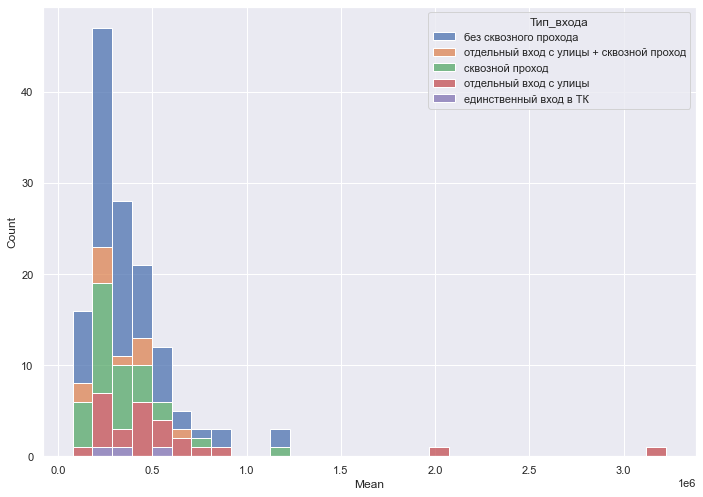

In [467]:
sns.histplot(data=X_train_gain, multiple="stack", bins = 30,
             x = "Mean", hue = "Тип_входа")

<AxesSubplot:xlabel='Формат_магазина', ylabel='Mean'>

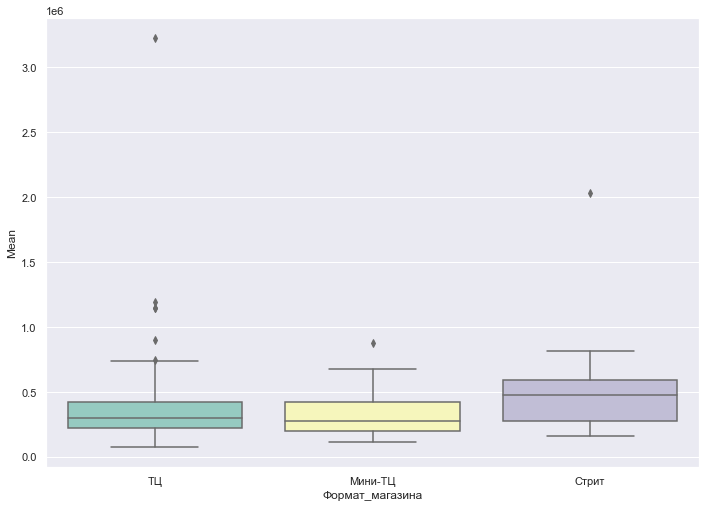

In [468]:
sns.boxplot(data = X_train_gain,
            x = 'Формат_магазина', y = 'Mean',
            palette="Set3")

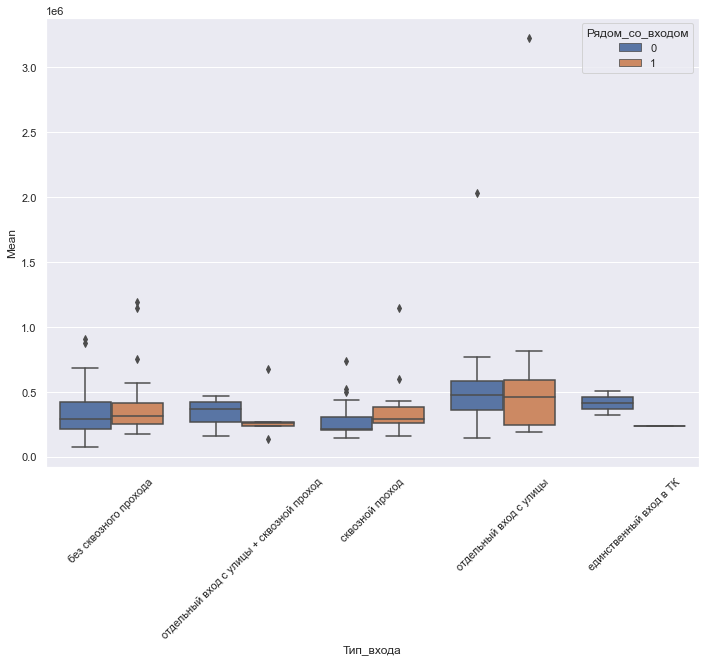

In [478]:
sns.boxplot(data = X_train_gain,
            x = 'Тип_входа', y = 'Mean', hue = "Рядом_со_входом")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

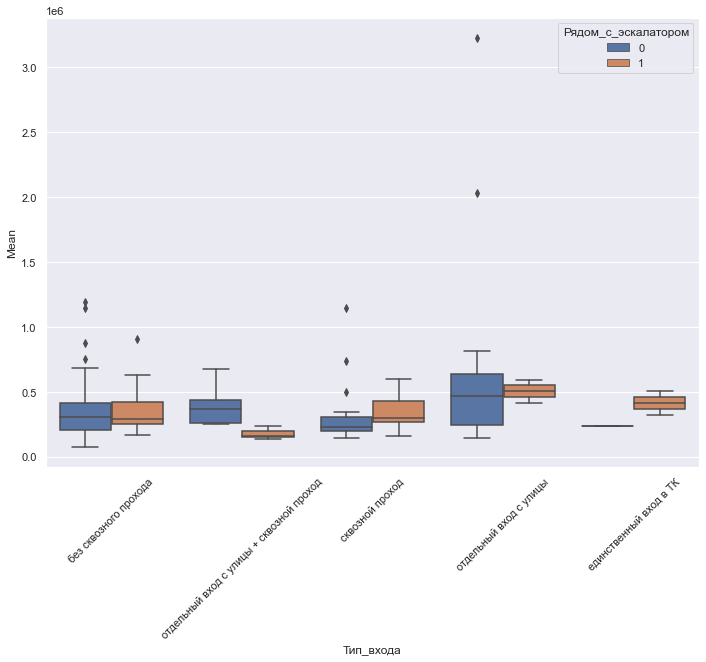

In [476]:
sns.boxplot(data = X_train_gain,
            x = 'Тип_входа', y = 'Mean', hue = "Рядом_с_эскалатором")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

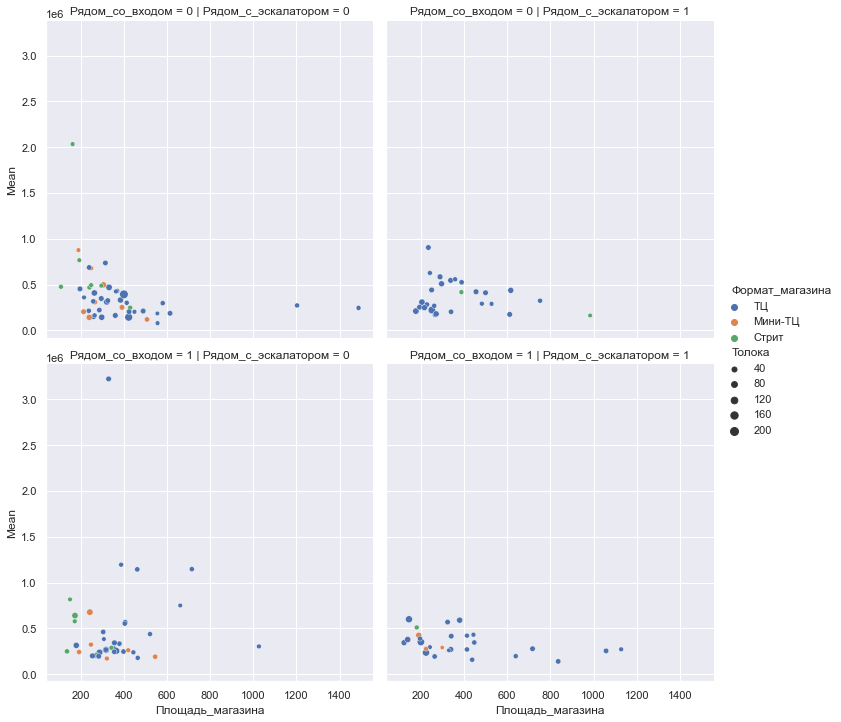

In [488]:
sns.relplot(data=X_train_gain,
            x = X_train_gain.Площадь_магазина, y = X_train_gain.Mean,
            hue = "Формат_магазина", size = "Толока", col = 'Рядом_с_эскалатором',
           row = "Рядом_со_входом")

In [444]:
X_train_gain.columns

Index(['ID', 'Адрес', 'Широта', 'Долгота', 'Дата_открытия', 'Дата_закрытия',
       'Площадь_магазина', 'Тип_входа', 'Площадь_ТЦ', 'Формат_магазина',
       'Парковка', 'Этаж', 'Время_работы', 'Заполненность_ТЦ',
       'Рядом_с_эскалатором', 'Рядом_со_входом', 'Конкуренты_в_ТЦ',
       'Расположение_в_ТЦ', 'Толока', 'Люкс', 'Выборка', 'Mean'],
      dtype='object')

<AxesSubplot:xlabel='Люкс', ylabel='Count'>

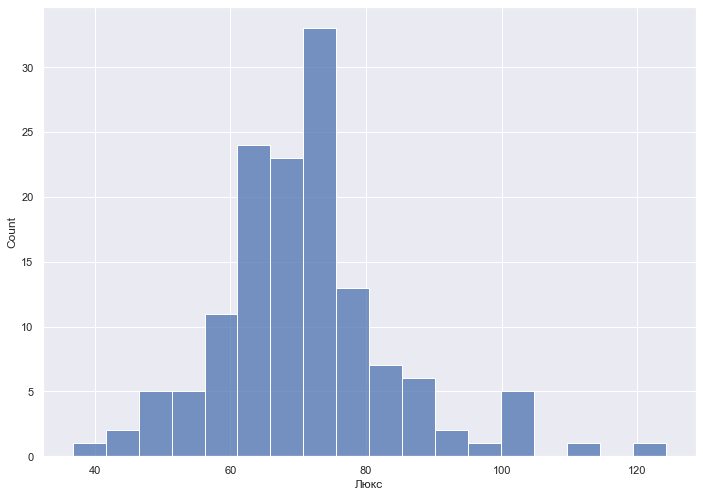

In [474]:
sns.histplot(data=X_train_gain,
            x = X_train_gain.Люкс)